# MechaRela Numerical Simulation - Intro

# Numerical Solutions

This Jupyter notebook contains exercises and examples for the first year BSc Applied Physics course "Classical Mechanics and Relativity Theory".
The purpose of this notebook is:
<ul>
    <li>help students solve problems that are hard to do analytically</li>
    <li>help students developing physics models</li>
</ul>

We will not worry too much about the 'numerical solvers'. On the contrary, we will use mostly the simple 'Euler forward' approach. This is a straightforward way of trying to numerically solve first-order differential equations. The idea is simple: we write the differential equation in the form of its related difference equation.

# <b>Example</b>

A particle of mass $m$ falls from rest from a height $h$ in the gravitational field (gravity's acceleration is $-g$, i.e. we have our z-axis point upwards). Friction is ignored for now to show you the idea.

**Question**: What is the velocity of the particle as a function of time and what is its position?

To answer this question we formulate the equation of motion for the particle (i.e. use Newtons second law $F$=$ma$).

$m\frac{dv}{dt} = -mg$

and we supplement it with the initial condition: $t=0 \rightarrow v(t=0)=0$

Solving it gives:
$v(t) = -gt$

We find the position by using:
$\frac{dz}{dt} = v$
with initial condition $t=0 \rightarrow z(t=0)=h$. And we find
$z(t) = h - \frac{1}{2}gt^2$

We can easily draw the velocity and the position as a function of time. First we calculate when the particle hits the ground ($z=0$).
$z(T)=0 \rightarrow T = \sqrt{\frac{2h}{g}}$

We can plot the result: see python code below that generates the figures form the start of the drop to when the particle hits the ground at $t = T$.

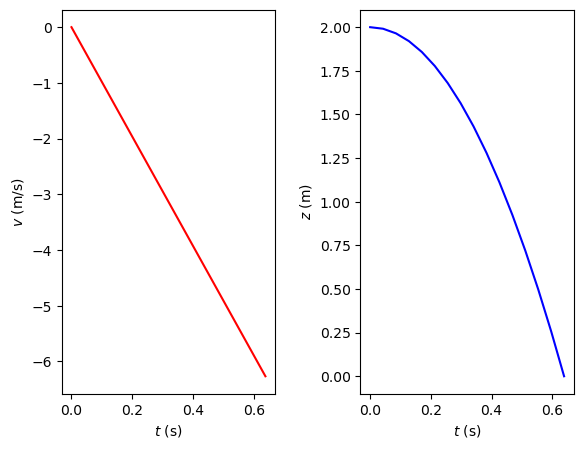

In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.813       # gravity's acceleration in m/s2
h = 2           # assume initial height is 2m
T = np.sqrt(2*h/g)

N=15
dt = T/N
t = []
v = []
i = 0
t = 0*np.linspace(0,N,N+1)
v = 0*np.linspace(0,N,N+1)
z = 0*np.linspace(0,N,N+1)

while i < N+1:
    t[i] = i*dt
    v[i] = -g*t[i]
    z[i] = h -g/2.0*t[i]*t[i]
    i = i+1

plt.subplot(121)
plt.plot(t,v,'r-')
plt.xlabel('$t$ (s)')
plt.ylabel('$v$ (m/s)')
plt.subplot(122)
plt.plot(t,z,'b-')
plt.xlabel('$t$ (s)')
plt.ylabel('$z$ (m)')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()


# Numerical solution

Instead of solving the equation of motion, as done above, via analytical techniques, we could also use a numerical approach.
Using the numerical approach, we let the computer compute the changes in velocity and position at discrete time instances. The basic idea is as follows:

Instead of writing for the equation of motion
$\frac{dv}{dt} = -g$,
we approximate the derivative $\frac{dv}{dt}$ by its difference quotient $\frac{v(t+\Delta t)- v(t)}{\Delta t}$ and we don't take the limit of $\Delta t \rightarrow 0$. Instead we let $\Delta t$ be small. How small? That depends on the problem.

For developing your code, it is easier to write the variables in a slightly different way. Instead of time $t$, we will use $i*dt$. We only calculate the variables in our problem on discrete times: $t=0, dt, 2dt, 3dt, ...$. So, we can number them from 0, 1, 2, 3, .... For the above example that means:

$\begin{eqnarray}
t &= &(0,dt,2dt,3dt, ...) \\
v &= &(v[0], v[1], v[2], v[3], ...)
\end{eqnarray}$

We solve the equation of motion in an approximate way: by calculation the velocity at the next time $t[i+1]$ from what we know at $t[i]$.

$\frac{v[i+1] - v[i]}{dt} = -g \Rightarrow v[i+1] = v[i] - g*dt$

To make a distinction with the variables used in the analytical example above, we will denote them all by an extra $num$ for "numerical". In later examples, we will not do so: it is cumbersome to do all the typing and you easily make mistakes. 

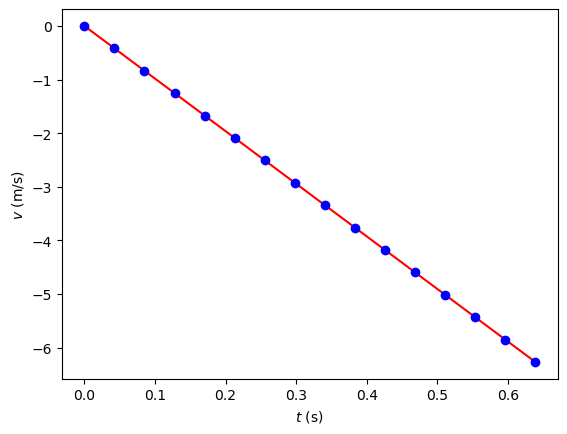

In [2]:
import numpy as np
import matplotlib.pyplot as plt

g_num = 9.813       #gravity's acceleration in m/s2
h_num = 2           #assume initial height is 2m
T_num = np.sqrt(2*h_num/g_num)
N_num=15

dt_num = T_num/N_num
i_num=0
t_num = 0*np.linspace(0,N_num,N_num+1)
v_num = 0*np.linspace(0,N_num,N_num+1)

while i_num < N_num:
    t_num[i_num+1] = (i_num+1)*dt_num
    v_num[i_num+1] = v_num[i_num] - g*dt_num
    i_num = i_num+1
    
plt.plot(t,v,'r-',t_num,v_num,'bo')
plt.xlabel('$t$ (s)')
plt.ylabel('$v$ (m/s)')

plt.show()

As we can see: the numerical solution is on top of the analytical one!

# Euler Forward
The numerical solution technique we used in the above example is called "Euler forward" and is one of the easiest both to understand and to implement. However, it is by far not the best. As we mentioned earlier: the value of $dt$ needs to be small: the smaller the better. But there are more considerations for a good numerical method. It also needs to be '**stable**', that is the solution should not start oscillation or run away. These are subjects in itself and we will leave them for other courses such as System and Signals and Computational Sciences both in year two.

We have solved the velocity, but not yet the position. That, however, is now straight forward:

$\frac{dx}{dt} = v \Rightarrow x[i+1] = x[i] + v[i]*dt$

Turned into computer code we get:

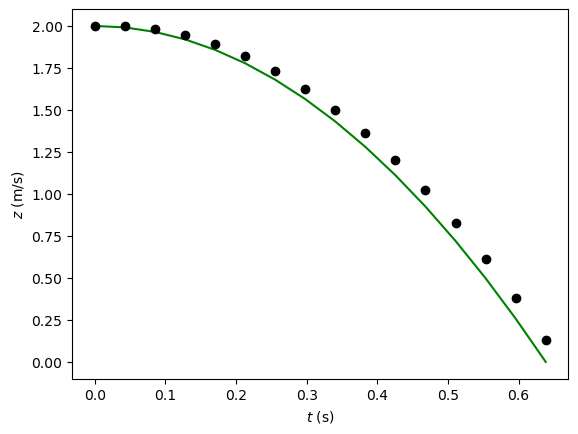

In [3]:
import numpy as np
import matplotlib.pyplot as plt

z_num = 0*np.linspace(0,N_num,N_num+1)
z_num[0] = h
i_num = 0
while i_num < N_num:
    z_num[i_num+1] = z_num[i_num] + v_num[i_num]*dt_num
    i_num = i_num+1
    
plt.plot(t,z,'g-',t_num,z_num,'ko')
plt.xlabel('$t$ (s)')
plt.ylabel('$z$ (m/s)')

plt.show()

As we clearly see: the numerical solution does not follow the analytical one. We can improve this, by realizing that we calculated the new position, `z_num[i_num+1]`, by using the velocity at the beginning of the motion from `z_num[i_num]`. That is obviously underestimating the velocity over the trajectory from `z_num[i_num]` to `z_num[i_num+1]` as the particle is accelerating downward. 
What if we try the average velocity `1/2*(v_num[i_num]+v_num[i_num+1])`? That might give more accurate results.
Run the code below and see that this indeed helps. The other solution is to make the time step smaller and smaller, but this comes at the cost at much more computations.

In [4]:
z_num = 0*np.linspace(0,N_num,N_num+1)
z_num[0] = h
i_num = 0
while i_num < N_num-1:
    z_num[i_num+1] = z_num[i_num] + 1/2*(v_num[i_num]+v_num[i_num+1])*dt_num
    i_num = i_num+1
    
plt.plot(t,z,'g-',t_num,z_num,'ko')
plt.xlabel('$t$ (s)')
plt.ylabel('$z$ (m/s)')

plt.show()

# Programme Skeleton 

In many cases, we will solve in essence Newton's second law. This is a second order linear differential equation with constant coefficients. It can be solved with the ideas listed above. Instead of directly solving the second order equation, we turn it into a set of two first order differential equations (which is mathematically equivalent as you will learn later).

$F = ma \Rightarrow \frac{d^2x}{dt^2} = \frac{F}{m}$ 

Use $a = \frac{d^2x}{dt^2} = \frac{dv}{dt}$ and use $v = \frac{dx}{dt}$

This allows to write the second order problem into two coupled first order problems

$ \left [ 
\begin{eqnarray}
\frac{dv}{dt} &= \frac{F}{m} \\
 \frac{dx}{dt} &= v 
 \end{eqnarray}
 \right . $
 
 A python code would look something like this:

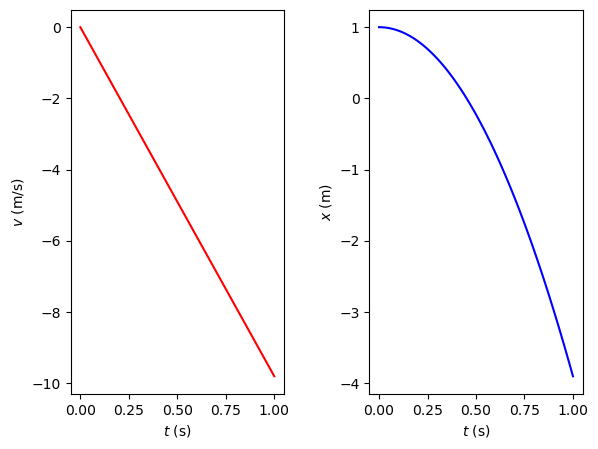

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# initiate the required variables / add additional ones if needed
# change the values if needed
N = 100         #replace this by the value you need for your problem
dt = 1e-2       #replace this by the value you need for your problem
m = 1           #replace this by the value you need for your problem

i = 0
t = 0*np.linspace(0,N,N+1)
v = 0*np.linspace(0,N,N+1)
x = 0*np.linspace(0,N,N+1)

# provide the initial conditions
x0 = 1     #replace this by the actual initial condition
v0 = 0     #replace this by the actual initial condition
x[0] = x0
v[0] = v0

# define the function F/m
def force(x,v):
    # Note: In this case, `x` and `v` are unused
    force = -9.81      # replace this line with the actual F/m - expression
    return force

while i < N:
    t[i+1] = (i+1)*dt
    v[i+1] = v[i] + force(x[i], v[i])*dt
    x[i+1] = x[i] + (v[i]+v[i+1])*dt/2.0
    i = i+1
 
# plot the results
plt.subplot(121)
plt.plot(t,v,'r-')
plt.xlabel('$t$ (s)')
plt.ylabel('$v$ (m/s)')
plt.subplot(122)
plt.plot(t,x,'b-')
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# show the plots
plt.show()